In [1]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
path = 'C:/Users/COM/python_work/data/'
import matplotlib.pyplot as plt
import missingno as msno
import numpy  as np
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
path = './data/'
pd.options.display.max_rows = 150
pd.options.display.max_columns = 350
plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

pd.options.display.max_rows = 999

In [2]:
sido = pd.read_csv(path+'sido_imp_10.csv', encoding='cp949')
sigungu = pd.read_csv(path+'시군구별지역안전지표_2015.csv', encoding='cp949')


## 데이터모양확인 및 split

In [3]:
sido.iloc[:,-7:-6]

,화재
0,1
1,0
2,0
3,0
4,0
5,1
6,0
7,0
8,0
9,1


In [4]:
sido.화재

0     1
1     0
2     0
3     0
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    0
12    1
13    0
14    0
15    1
16    0
Name: 화재, dtype: int64

In [5]:
sido.shape, sigungu.shape

((17, 173), (226, 310))

In [6]:
sido_y = sido.iloc[:,-7:]
sido_x = sido.iloc[:,3:-7]
sido_name = sido.iloc[:,:3]
sigungu_y= sigungu.iloc[:,-7:]
sigungu_x= sigungu.iloc[:,3:-7]
sigungu_name = sido.iloc[:,:3]

In [7]:
sido_y.shape, sido_x.shape,sido_name.shape

((17, 7), (17, 163), (17, 3))

In [8]:
sigungu_y.shape, sigungu_x.shape, sigungu_name.shape

((226, 7), (226, 300), (17, 3))

## 표준화 (MinmaxScaler)
* 다른 스케일러 robust_scale(), maxabs_scale(), scale(), 
* minmaxscaler() 범위조정(0,1)
* 로 만들어진 데이터셋도 시도해봐야한다.

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1)) #범위 임의지정했는데 괜?
#독립변수에 일괄적용
sido_x_scaled = scaler.fit_transform(sido_x)
#sigungu_x_scaled = scaler.fit_transform(sigungu_x)

In [10]:
#scale결과 array를 데이터프레임으로 만들고 열이름을 새로 지정해준다.
#sigungu_x_scaled = pd.DataFrame(data = sigungu_x_scaled)
#sigungu_x_scaled.columns = sigungu_x.columns
sido_x_scaled = pd.DataFrame(data = sido_x_scaled)
sido_x_scaled.columns = sido_x.columns

In [11]:
sido_x_scaled.shape#, sigungu_x_scaled.shape

(17, 163)

# Feature Importance

In [12]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier

### RandomForestClassifier

In [13]:
#importance... RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200).fit(sido_x_scaled, sido.화재)
feature_importance_rf = pd.DataFrame(data=np.c_[sido_x_scaled.columns.values,rf.feature_importances_],
                                     columns=['feature','FI1'])
#feature_importance_rf.sort_values('FI',ascending=False,inplace=True)
feature_importance_rf

,feature,FI1
0,1인가구수,0.00655159
1,5대범죄 발생건수,0.00573326
2,가스공급설비 면적,0
3,가스사고발생건수,0.01258
4,가해(타살) 사망자수,0.0285853
5,감염병 발생건수,0.00341958
6,감염병 사망자수,0.00442643
7,건강보험급여실적,0.00902961
8,건설업 업체수,0.00696429
9,건설업 종사자수,0.00676839


### 랜덤 포레스트 모델확인

In [14]:
from sklearn.metrics import confusion_matrix
y_pred = rf.predict(sido_x_scaled) #y_test와 비교

cm = confusion_matrix(y_pred, sido.화재)
precision = cm[1,1]/ (cm[0,1]+cm[1,1])
recall = cm[1,1]/(cm[1,0]+cm[1,1])
f_measure = (2*precision*recall) / (precision+recall)
print(f'{rf}: precision:{round(precision,3)}, recall:{round(recall,3)}, f-measure:{round(f_measure,3)}')
print(cm)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False): precision:1.0, recall:1.0, f-measure:1.0
[[11  0]
 [ 0  6]]


### xgboost

In [15]:
#importance... xgboost
xg = XGBClassifier(max_depth=10, n_estimators=200, learning_rate=0.01).fit(sido_x_scaled, sido.화재)
feature_importance_xg = pd.DataFrame(data=np.c_[sido_x_scaled.columns.values,xg.feature_importances_],
                                     columns=['feature','FI2'])
#feature_importance_rf.sort_values('FI',ascending=False,inplace=True)
feature_importance_xg 

,feature,FI2
0,1인가구수,0.0349947
1,5대범죄 발생건수,0
2,가스공급설비 면적,0
3,가스사고발생건수,0
4,가해(타살) 사망자수,0
5,감염병 발생건수,0
6,감염병 사망자수,0
7,건강보험급여실적,0
8,건설업 업체수,0
9,건설업 종사자수,0.0250437


### xgboost 모델확인

In [16]:
from sklearn.metrics import confusion_matrix
y_pred = xg.predict(sido_x_scaled) #y_test와 비교

cm = confusion_matrix(y_pred, sido.화재)
precision = cm[1,1]/ (cm[0,1]+cm[1,1])
recall = cm[1,1]/(cm[1,0]+cm[1,1])
f_measure = (2*precision*recall) / (precision+recall)
print(f'{xg}: precision:{round(precision,3)}, recall:{round(recall,3)}, f-measure:{round(f_measure,3)}')
print(cm)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.01,
       max_delta_step=0, max_depth=10, min_child_weight=1, missing=None,
       n_estimators=200, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1): precision:0.833, recall:1.0, f-measure:0.909
[[11  1]
 [ 0  5]]


C:\Users\COM\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


### lgbm

In [17]:
import copy
#lgbm은 아스키 코드값만 입력받기 때문에 한글을 다 숫자로 바뀌주기
lgbm_sido = b = copy.deepcopy(sido_x_scaled) 
lgbm_sido .columns = list(range(163))

In [18]:
lgbm= LGBMClassifier(n_estimators=200,num_boost_round =500,learning_rate =0.01).fit(lgbm_sido, sido.화재)
feature_importance_lg = pd.DataFrame(data=np.c_[lgbm_sido.columns.values,lgbm.feature_importances_],
                                     columns=['feature','FI3'])
#feature_importance_rf.sort_values('FI',ascending=False,inplace=True)
feature_importance_lg 

C:\Users\COM\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


,feature,FI3
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
5,5,0
6,6,0
7,7,0
8,8,0
9,9,0


### lgbm 모델확인

In [19]:
sido.화재

0     1
1     0
2     0
3     0
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    0
12    1
13    0
14    0
15    1
16    0
Name: 화재, dtype: int64

In [20]:
from sklearn.metrics import confusion_matrix
y_pred = lgbm.predict(sido_x_scaled) #y_test와 비교

cm = confusion_matrix(y_pred, sido.화재)
precision = cm[1,1]/ (cm[0,1]+cm[1,1])
recall = cm[1,1]/(cm[1,0]+cm[1,1])
f_measure = (2*precision*recall) / (precision+recall)
print(f'{lgbm}: precision:{round(precision,3)}, recall:{round(recall,3)}, f-measure:{round(f_measure,3)}')
print(cm)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.01, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=200, n_jobs=-1, num_boost_round=500, num_leaves=31,
        objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
        silent=True, subsample=1.0, subsample_for_bin=200000,
        subsample_freq=0): precision:0.0, recall:nan, f-measure:nan
[[11  6]
 [ 0  0]]


C:\Users\COM\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\COM\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in longlong_scalars
  


## 랜덤포레스트 기반, XGBOOST 기반 Feature importance

In [21]:
df=feature_importance_rf.merge(feature_importance_xg, left_on='feature', right_on='feature')
df.sort_values('FI2', ascending=False, inplace=True)
df
# 값이 완전히 같은 것을 확인 할 수 있다. xg와 랜덤포레스트 값의 차이가 없음

,feature,FI1,FI2
87,위험물 제조소수,0.0287821,0.244365
33,대기오염도,0.0150832,0.157624
156,화재 사망자수,0.0167464,0.142103
97,의료보장 근로자 사업장수,0.0127646,0.108452
53,보건업 및 사회복지서비스업 종사자수,0.00572115,0.0357686
72,식중독 발생자수,0.00222994,0.0357419
0,1인가구수,0.00655159,0.0349947
44,범죄발생건수(강도),0.0160286,0.0349898
137,지역안전도(점수),0.00257576,0.0349154
26,구조발생건수,0.0102363,0.0346993


In [22]:
df.set_index(df['feature'], inplace=True)

In [23]:
df.drop('feature', axis=1, inplace=True)

In [24]:
df.index

Index(['위험물 제조소수', '대기오염도', '화재 사망자수', '의료보장 근로자 사업장수', '보건업 및 사회복지서비스업 종사자수',
       '식중독 발생자수', '1인가구수', '범죄발생건수(강도)', '지역안전도(점수)', '구조발생건수',
       ...
       '보행자전용·우선도로 면적', '보행자전용·우선도로 연장', '빈집수', '산림면적', '산림면적 비율', '산불발생건수',
       '산불피해면적', '상업지역 면적', '성폭력 발생건수', '황사 발생건수'],
      dtype='object', name='feature', length=163)

### 축적그래프(xgboost 기준)

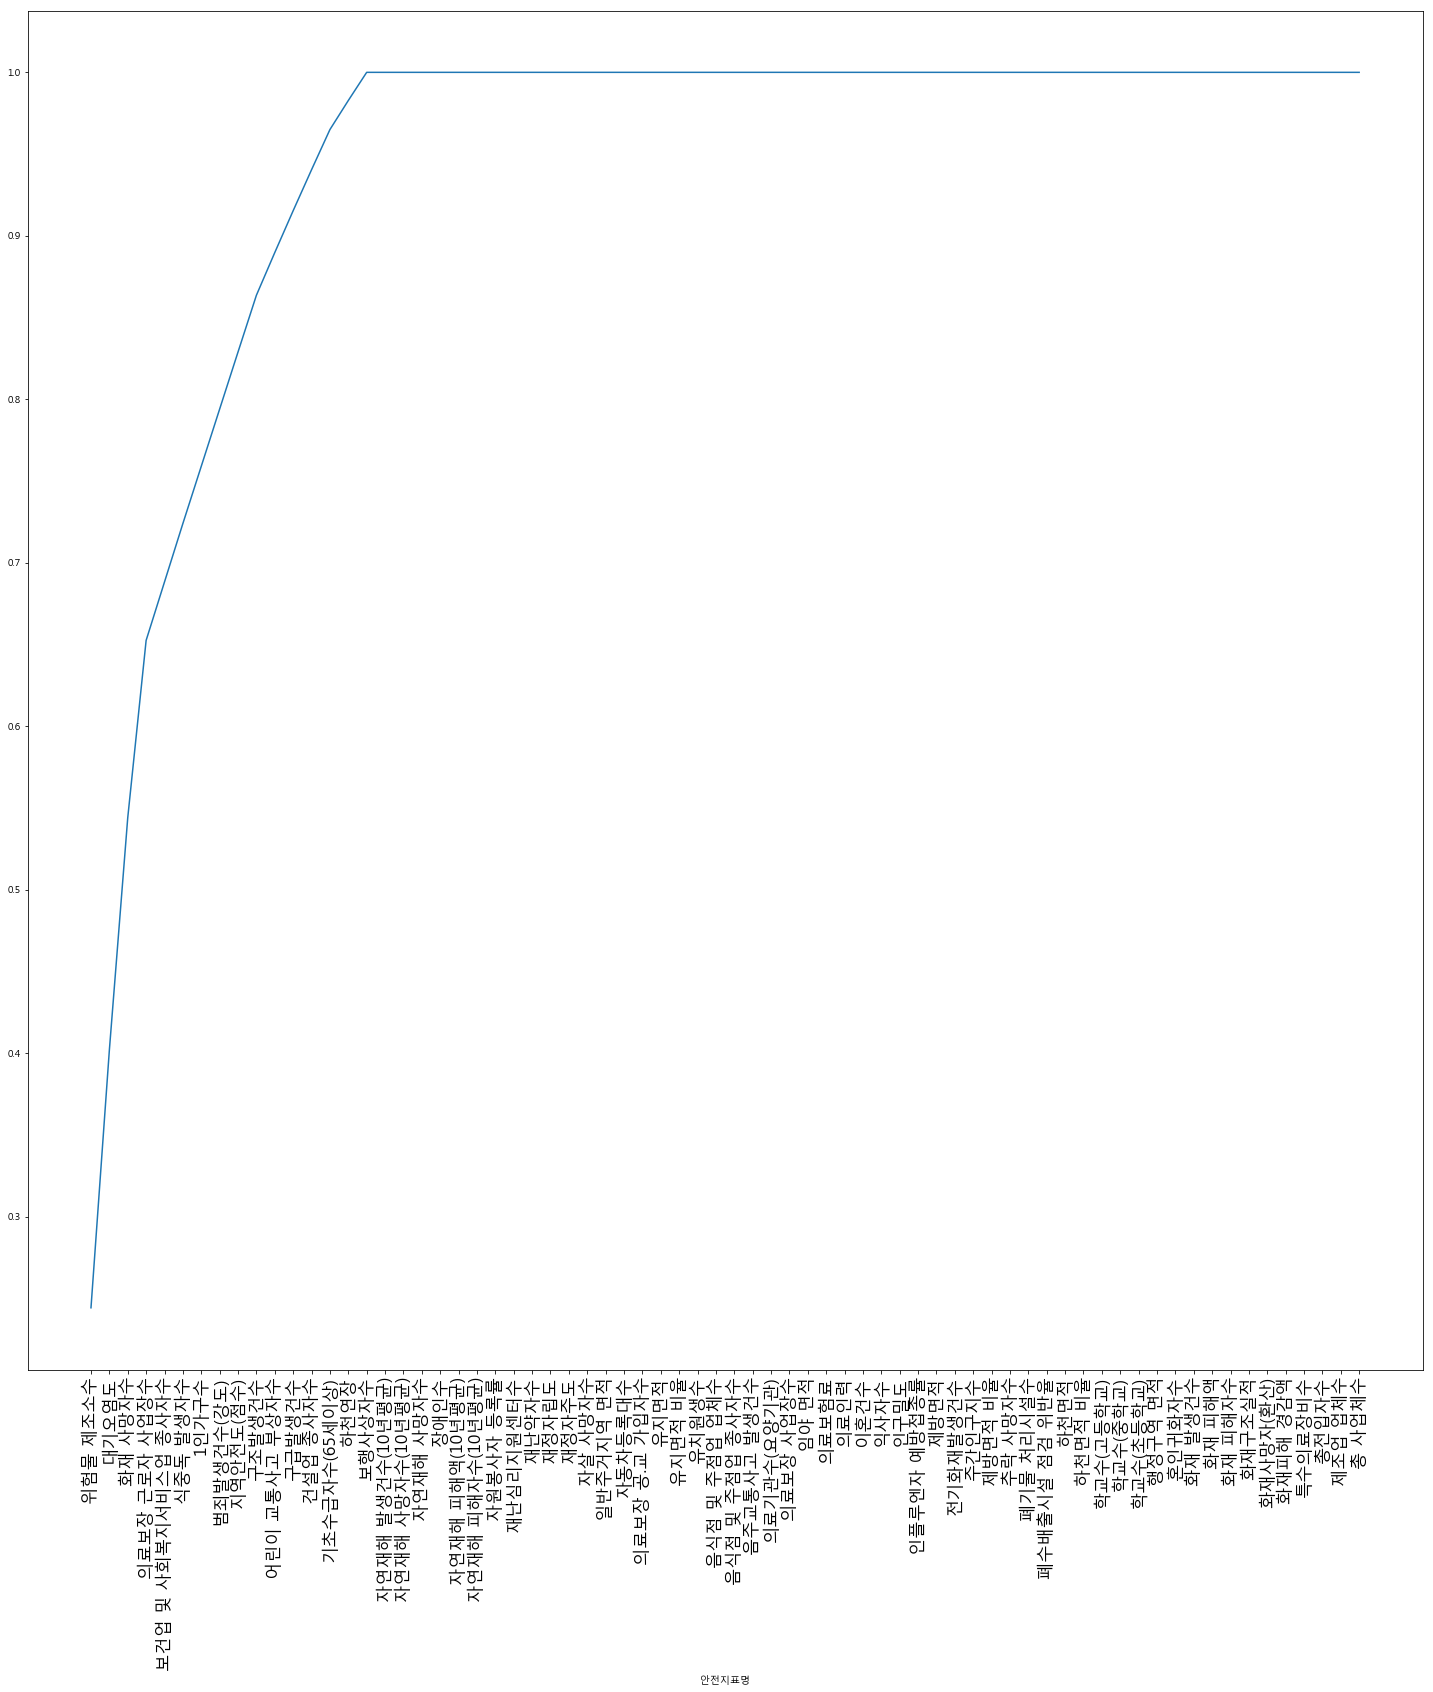

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

s1 = df['FI2'].head(70).cumsum()
fig =plt.figure(figsize=(25,25))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('안전지표명')
ax.set_xticklabels((df.head(90)).index,rotation=90,fontsize='xx-large')
ax.plot(s1)